# **12-Forced Mass Spring Systems**

---

### **Introduction**

This notebook goes over the concept of resonance and forced spring mass systems.

---

### **Author**
**Junichi Koganemaru**  

---

### **Last Updated**
**February 1, 2025**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Pure resonance

Consider a forced mass-spring system without damping modeled via the equation 
$$
mx''(t) + kx(t) = F_0 \sin \omega t, \; t \in \mathbb{R}
$$
for $\mathbb{R} \ni m,k, F_0, \omega > 0$. By defining the *natural frequency* 
$$
\omega_0 := \sqrt{\frac{k}{m}},
$$
the system is also modeled by the equivalent equation 
$$
x''(t) + \omega_0^2 x(t) = \frac{F_0}{m} \sin \omega t, \; t \in \mathbb{R}.
$$
The homogeneous solution to this equation is 
$$
x_h(t) = c_1 \cos (\omega t) + c_2 \sin (\omega t), \; t \in \mathbb{R}.
$$
Recall that we can rewrite the general homogeneous solution as 
$$
\begin{aligned}
x_h(t) &= C \sin (\omega t + \alpha) \\
&= (C \sin \alpha) \cos \omega t + (C \cos \alpha) \sin \omega t, \; t \in \mathbb{R},
\end{aligned}
$$
which requires $C > 0$, $\alpha \in [0,2\pi)$ to be chosen so that 
$$
\begin{cases}
c_2 = C \cos \alpha \\
c_1 = C \sin \alpha.
\end{cases}
$$
This is analogous to conversion between Cartesian coordinates to polar coordinates, and we choose $C > 0$, $\alpha \in [0,2\pi)$ so that 
$$
C^2 = c_1^2 + c_2^2, \; \tan \alpha = \frac{c_1}{c_2}.
$$
The exact quadrant that $\alpha$ lives in depends on the signs of $c_1$ and $c_2$. Now that we have the general homogeneous solution, we may look for a particular solution to the equation. We consider two cases. 

1. **Case 1: $\omega \neq \omega_0$.** Suppose the forced frequency $\omega$ is not equal to the natural frequency $\omega_0$. Then we may use the ansatz 
$$
x_p(t) = A \cos \omega t + B \sin \omega t, \; t \in \mathbb{R}.
$$
Then 
$$
\begin{aligned}
x_p'(t) &= B\omega \cos \omega t - A \omega \sin \omega t, \\
x_p''(t) &= -A\omega^2 \cos \omega t - B \omega^2 \sin \omega t
\end{aligned}
$$
for all $t \in \mathbb{R}$. Thus 
$$
x_p''(t) + \omega_0^2 x_p(t) = (-A\omega^2 + A\omega_0^2) \cos \omega t + (- B \omega^2 + B \omega_0^2)  \sin \omega t = \frac{F_0}{m} \sin \omega t, \; t \in \mathbb{R}.
$$
This implies that $A = 0$ and $B = \frac{F_0}{m(\omega_0^2 - \omega^2)}$. Therefore a particular solution to the equation is 
$$
x_p(t) = \frac{F_0}{m(\omega_0^2 - \omega^2)} \sin \omega t.
$$
Note that for all $t \in \mathbb{R}$, 
$$
\left| x_p(t) \right| \le \left| \frac{F_0}{m(\omega_0^2 - \omega^2)} \right|,
$$
meaning that the amplitude remains bounded for all time, however as $\omega \to \omega_0$, 
$$
\left| \frac{F_0}{m(\omega_0^2 - \omega^2)} \right| \to \infty.
$$

2. **Case 2: $\omega = \omega_0$.** In this case we need to modify our ansatz to be 
$$
x_p(t) = At \cos \omega t + B t \sin \omega t, \; t \in \mathbb{R}.
$$
We calculate 
$$
\begin{aligned}
x_p'(t) &= (B\omega t + A) \cos \omega t  +(-A\omega t + B) \sin \omega t, \\
x_p''(t) &= (-A\omega^2t + B\omega + B \omega) \cos \omega t + ( -B \omega^2t - A \omega  - A \omega)\sin \omega t \\
&=(-A\omega^2t + 2 B\omega ) \cos \omega t + ( -B \omega^2t - 2 A \omega)\sin \omega t
\end{aligned}
$$
for $ t \in \mathbb{R}$. Thus 
$$
\begin{aligned}
x_p''(t) + \omega^2 x_p(t) &= (-A\omega^2t + 2 B\omega + A \omega^2 t ) \cos \omega t + ( -B \omega^2t  - 2 A \omega + B \omega^2 t)\sin \omega t \\
&= 2 B \omega \cos \omega t - 2 A \omega \sin \omega t = \frac{F_0}{m} \sin \omega t, \; t \in \mathbb{R}.
\end{aligned}
$$
Thus $B = 0$ and $A = -\frac{F_0}{2m\omega}$. Therefore a particular solution is 
$$
x_p(t) = -\frac{F_0}{2 m \omega} t\cos \omega t, \; t \in \mathbb{R}.
$$
Note that 
$$
-\frac{F_0}{2 m \omega} t \le  x_p(t) \le \frac{F_0}{2 m \omega} t
$$
for all $t \in \mathbb{R}$ and $ \frac{F_0}{2 m \omega} t \to \infty$ as $t \to \infty$. This is the phenomenon of [*pure resonance*](https://en.wikipedia.org/wiki/Resonance): when the **forcing frequency is equal to the natural frequency**, the amplitude becomes unbounded as $t \to \infty$. 


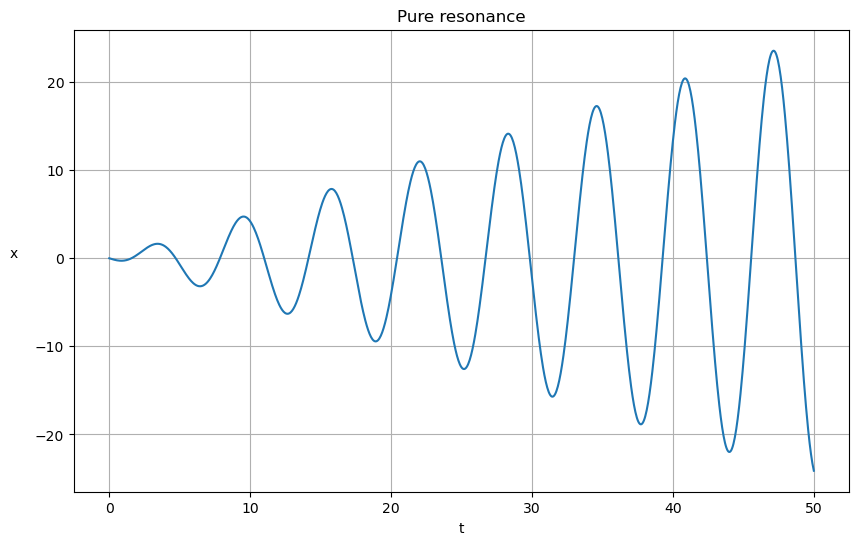

In [3]:
m = 1.0  
k = 1.0  
F0 = 1.0 
omega0 = np.sqrt(k / m)  
omega = omega0  
t = np.linspace(0, 50, 1000)  

A = -F0 / (2 * m * omega)
x_p = A * t * np.cos(omega * t)

plt.figure(figsize=(10, 6))
plt.plot(t, x_p)
plt.title('Pure resonance')
plt.xlabel('t')
plt.ylabel('x', rotation=0, labelpad=15)
plt.grid(True)
plt.show()

## Forced systems with damping
If damping is introduced, i.e. the equation is modeled via 
$$
mx''(t) + \beta x'(t) + kx(t) = F_0 \sin \omega t, \; t \in \mathbb{R}
$$
where $\beta > 0$, then the homogeneous solution is of the form 
$$
x_h(t) = e^{-\lambda t}(c_1 x_1(t) + c_2 x_2(t)), \; t \in \mathbb{R},
$$
where $\lambda > 0$ and $c_1, c_2$ are arbitrary. The ansatz for a particular solution is then 
$$
x_p(t) = A \cos \omega t + B \sin \omega t, \; t \in \mathbb{R},
$$
since the exponential term guarantees that there will be no duplications between this ansatz and the homogeneous solution. 
The general solution is then 
$$
x(t) = x_h(t) + x_p(t), \; t \in \mathbb{R},
$$
and $x_p$ is purely oscillatory. Thus whenever damping exists, pure resonance never occurs. 

We also note that as $t \to \infty$, 
$$
\left| x(t) - x_p(t) \right| = \left| x_h(t) \right| \to 0,
$$
due to the presence of the decaying exponential. In this context we refer to the homogeneous solution $x_h$ as the *transient solution* and the particular solution $x_p$ as the *steady-state solution*, in the sense that in the long run, the contribution from $x_h$ becomes negligible and the behavior of the system is largely modeled by the steady-state solution, plus a negligible error term. 

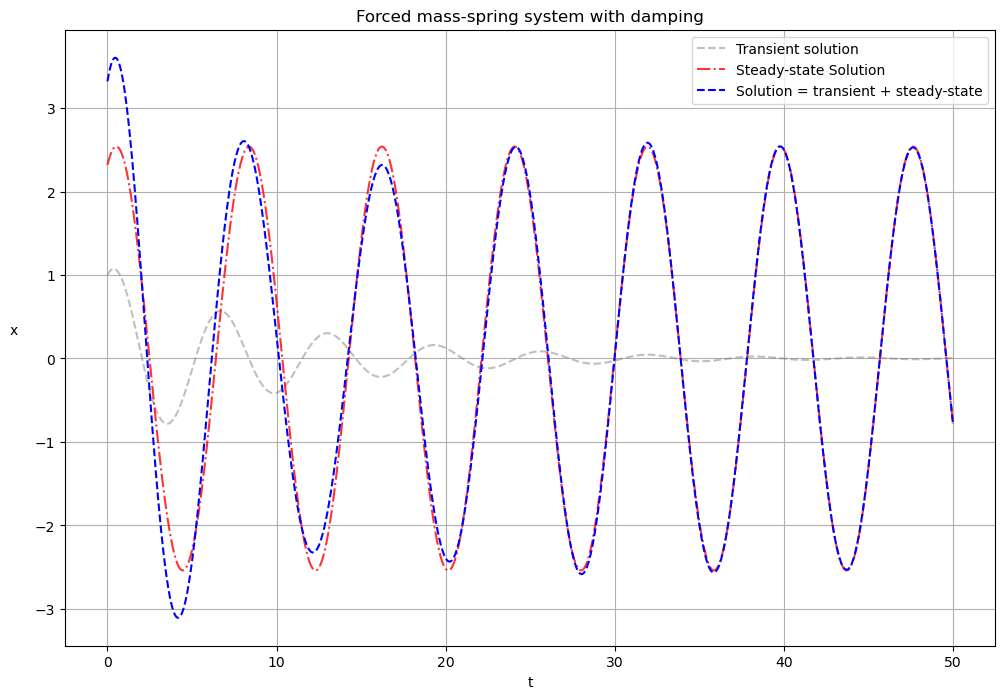

In [13]:
m = 1.0  
k = 1.0  
F0 = 1.0  
beta = 0.2  
omega0 = np.sqrt(k / m)  
omega = 0.8 * omega0  
t = np.linspace(0, 50, 1000)  

C1 = 1.0  
C2 = 0.5  
lambda_ = beta / (2 * m)
x_h = np.exp(-lambda_ * t) * (C1 * np.cos(np.sqrt(omega0**2 - lambda_**2) * t) + C2 * np.sin(np.sqrt(omega0**2 - lambda_**2) * t))

A = F0 / (m * np.sqrt((omega0**2 - omega**2)**2 + (beta * omega / m)**2))
phi = np.arctan((beta * omega) / (m * (omega0**2 - omega**2)))
x_p = A * np.cos(omega * t - phi)

x_total = x_h + x_p

plt.figure(figsize=(12, 8))
plt.plot(t, x_h, label='Transient solution', linestyle='--', color='gray', alpha = 0.5)
plt.plot(t, x_p, label='Steady-state Solution', linestyle='-.', color='red', alpha = 0.8)
plt.plot(t, x_total, label='Solution = transient + steady-state', linestyle='--', color='blue')
plt.title('Forced mass-spring system with damping')
plt.xlabel('t')
plt.ylabel('x', rotation=0, labelpad=15)
plt.legend()
plt.grid(True)
plt.show()